<a href="https://colab.research.google.com/github/arunravi8595/CE888/blob/main/Lab_2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [301]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [302]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv') #Read file source
data = df.values.T[1] #T= transpose data in row and column
size = np.size(data)
print(df.columns)

Index(['Day', ' Millons of pounds in sales'], dtype='object')


In [303]:
data = df[' Millons of pounds in sales'].values
print(type(data), data)

<class 'numpy.ndarray'> [ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [304]:
data = df.iloc[:,1].values
print(type(data), data)

<class 'numpy.ndarray'> [ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


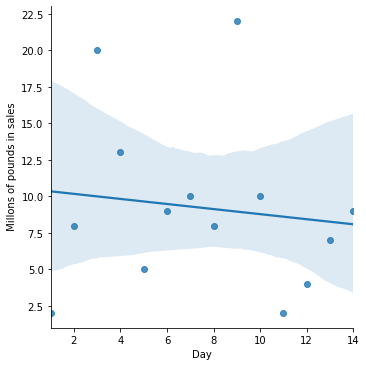

In [305]:
sns.lmplot(df.columns[0], df.columns[1],data=df, fit_reg=True) #scatter_plot(x,y,data_source, reg estimate of x & y)

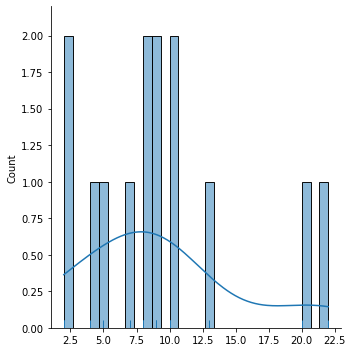

In [306]:
sns.displot(data, bins=30, kde=True, rug=True) #distribution_plot(source,interval width,density estimation, mark rugplot along axis )

In [307]:
data = df[df.columns[1]].values
print(("Mean: %f " %np.mean(data)))
print(("Median: %f " %np.median(data)))
print(("Var: %f " %np.var(data)))
print(("std: %f " %np.std(data)))

Mean: 9.214286 
Median: 8.500000 
Var: 32.311224 
std: 5.684296 


In [308]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):

  data = np.random.choice(x,(n_bootstraps, sample_size))
  mean = np.mean(data, axis=1)
  data_mean = np.mean(data)
  lower = np.percentile(mean, 2.5) #for 95% CI, remove 2.5 from top & bottom
  upper = np.percentile(mean, 97.5)
	
  return data_mean, lower, upper
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

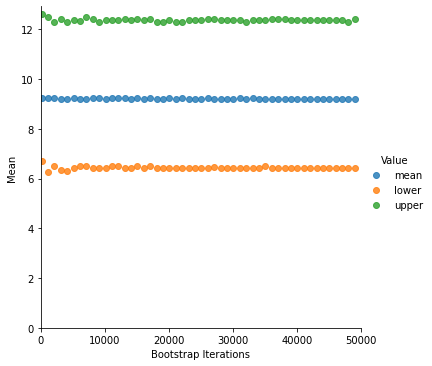

In [309]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [310]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):

  data = np.random.choice(sample,(n_bootstraps, sample_size))
  mean = np.mean(data, axis=1)
  data_mean = np.mean(data)
  low_ci = (100 - ((100-ci)/2))
  up_ci = ((100-ci)/2)
  lower = np.percentile(mean, low_ci)
  upper = np.percentile(mean, up_ci)

  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

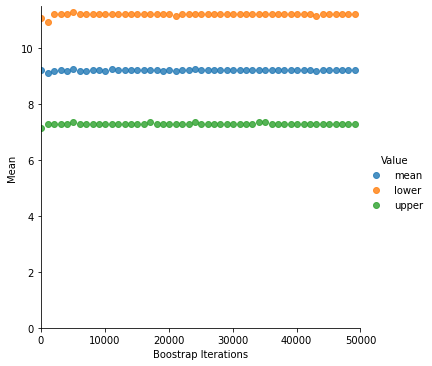

In [311]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [312]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


In [313]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [314]:
vehicle_df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")
data1 = df.values.T[0]
data2 = df.values.T[1]
vehicle_df.head()

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


In [315]:
vehicle_df.isnull().sum()

Current fleet      0
New Fleet        170
dtype: int64

In [316]:
data1 = df.iloc[:,0].values
print(type(data1), data1)

<class 'numpy.ndarray'> [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [317]:
data2 = df.iloc[:,1].values
print(type(data2), data2)

<class 'numpy.ndarray'> [ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


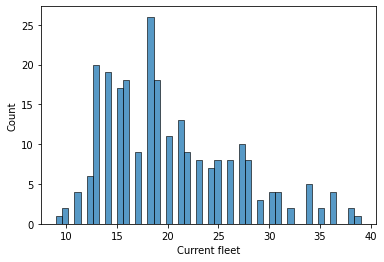

In [318]:
sns.histplot(vehicle_df["Current fleet"], bins = 50)

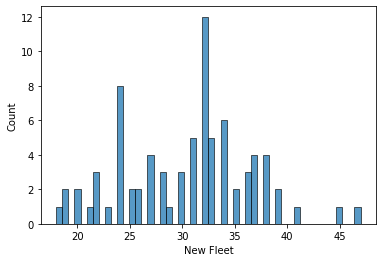

In [319]:
sns.histplot(vehicle_df["New Fleet"], bins = 50)


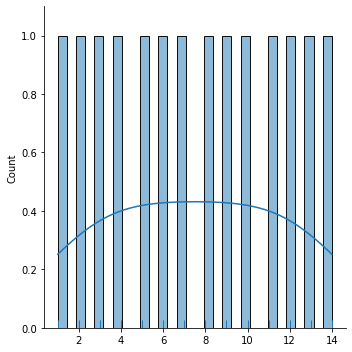

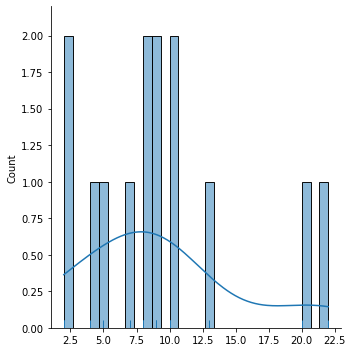

In [320]:
sns.displot(data1, bins=30, kde=True, rug=True) #Histogram for Current fleet

sns.displot(data2, bins=30, kde=True, rug=True) #Histogram for New fleet


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [321]:
current_mean = vehicle_df["Current fleet"].mean()
new_mean = vehicle_df["New Fleet"].mean()

print("Mean of Current Fleet: ", current_mean)
print("Mean of New Fleet: ", new_mean)

Mean of Current Fleet:  20.14457831325301
Mean of New Fleet:  30.481012658227847


In [322]:
def permutation(concat_array):
  np.random.shuffle(concat_array)
  return concat_array

In [323]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    count = 0
    sample1: np.array(sample1)
    sample2: np.array(sample2)

    sample1_len = len(sample1)
    sample1_mean = sample1.mean()
    sample2_mean = sample2.mean()
    mean_diff = sample2_mean - sample1_mean

    for i in range(n_permutations):
      concat = np.concatenate((sample1, sample2))
      concat = permutation(concat)
      new_sample1 = concat[:sample1_len]
      new_sample2 = concat[sample1_len:]
      new_sample1_mean = new_sample1.mean()
      new_sample2_mean = new_sample2.mean()
      new_mean_diff = new_sample2.mean() - new_sample1.mean()

      if new_mean_diff > mean_diff:
        count +=1
    pvalue = count/n_permutations

    #n_permutations: number of permutations to calculate the p-value
  
    return pvalue

In [324]:
current_fleet = vehicle_df["Current fleet"].dropna()
new_fleet = vehicle_df["New Fleet"].dropna().astype("int64")

In [325]:
current_fleet.tail()

244    27
245    27
246    32
247    28
248    31
Name: Current fleet, dtype: int64

In [326]:
new_fleet.tail()

74    34
75    38
76    32
77    38
78    32
Name: New Fleet, dtype: int64

In [327]:
permut_test(current_fleet, new_fleet, 1000)

0.0

In [328]:
np.array(vehicle_df["Current fleet"])

array([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 22, 18, 21,
       21, 10, 10, 11,  9, 28, 25, 19, 16, 17, 19, 18, 14, 14, 14, 14, 12,
       13, 13, 18, 22, 19, 18, 23, 26, 25, 20, 21, 13, 14, 15, 14, 17, 11,
       13, 12, 13, 15, 13, 13, 14, 22, 28, 13, 14, 13, 14, 15, 12, 13, 13,
       14, 13, 12, 13, 18, 16, 18, 18, 23, 11, 12, 13, 12, 18, 21, 19, 21,
       15, 16, 15, 11, 20, 21, 19, 15, 26, 25, 16, 16, 18, 16, 13, 14, 14,
       14, 28, 19, 18, 15, 15, 16, 15, 16, 14, 17, 16, 15, 18, 21, 20, 13,
       23, 20, 23, 18, 19, 25, 26, 18, 16, 16, 15, 22, 22, 24, 23, 29, 25,
       20, 18, 19, 18, 27, 13, 17, 13, 13, 13, 30, 26, 18, 17, 16, 15, 18,
       21, 19, 19, 16, 16, 16, 16, 25, 26, 31, 34, 36, 20, 19, 20, 19, 21,
       20, 25, 21, 19, 21, 21, 19, 18, 19, 18, 18, 18, 30, 31, 23, 24, 22,
       20, 22, 20, 21, 17, 18, 17, 18, 17, 16, 19, 19, 36, 27, 23, 24, 34,
       35, 28, 29, 27, 34, 32, 28, 26, 24, 19, 28, 24, 27, 27, 26, 24, 30,
       39, 35, 34, 30, 22

In [329]:
current = [0,0,0,0,0,0,1,0,0,1,0]
new = [1,0,0,1,1,1,0,0,0,1,0]

In [330]:
bootstrap_mean_ci(current_fleet,len(current_fleet),10000,85)

(20.1441702811245, 20.734939759036145, 19.566265060240966)

In [331]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):

  data = np.random.choice(sample,(n_bootstraps, sample_size))
  mean = np.mean(data, axis=1)
  data_mean = np.mean(data)
  low_ci = (100 - ((100-ci)/2))
  up_ci = ((100-ci)/2)
  lower = np.percentile(mean, low_ci)
  upper = np.percentile(mean, up_ci)

  return data_mean, lower, upper

In [332]:
bootstrap_mean_ci(current_fleet, len(current_fleet), 10000,95)

(20.147124497991967, 20.951807228915662, 19.365461847389557)

In [333]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):

  mean_array = []
  sample = np.array(sample)
  bootstrap_array = np.random.choice(sample, size = (n_bootstraps,sample_size),replace = True)
  data_mean = bootstrap_array.mean()
  mean_array = []
  for i in range(bootstrap_array.shape[0]):
    mean_array.append(bootstrap_array[i].std())
  mean_array.sort()
  low_ci = (100 - ((100-ci)/2))
  up_ci = ((100-ci)/2)
  lower = np.percentile(mean_array, low_ci)
  upper = np.percentile(mean_array, up_ci)
  return data_mean, lower, upper

In [334]:
bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000, 80)

(20.141924899598393, 20.65863453815261, 19.626506024096386)

In [348]:
bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000, 85)

(20.142740562248996, 20.734939759036145, 19.55823293172691)

In [349]:
bootstrap_mean_ci(data, data.shape[0], 10000, 95)

(9.20145, 12.285714285714286, 6.428571428571429)

In [336]:
bootstrap_std_ci(current_fleet,len(current_fleet),10000,73)

(20.142740562248996, 6.704371757396249, 6.05318231253691)

In [337]:
bootstrap_std_ci(new_fleet,len(new_fleet),10000,99)

(30.495225316455695, 7.182405642159971, 4.8568592590386235)

In [351]:
bootstrap_std_ci(data, data.shape[0],10000,95)

(9.203157142857142, 7.3859439567269565, 2.718980901524897)

In [339]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [340]:
len(dem_share_PA)

67

In [341]:
len(dem_share_OH)


88

In [342]:
pa = pd.DataFrame(dem_share_PA)
oh = pd.DataFrame(dem_share_OH)

In [343]:
pa.mean()

0    45.476418
dtype: float64

In [344]:
oh.mean()

0    44.318182
dtype: float64

In [352]:
bootstrap_mean_ci(dem_share_PA,len(dem_share_PA),25000,90)

(45.48438719402984, 47.451432835820896, 43.56783582089553)

In [353]:
bootstrap_mean_ci(dem_share_OH,len(dem_share_OH),25000,90)

(44.31206812272729, 46.00592045454545, 42.57703409090908)